In [1]:
import      numpy               as      np
import      matplotlib.pyplot   as      plt
from        lib_Experimentum    import  *
from        Alessandria         import  *

#path dove stanno i dati del fit
now_path        =   '../BRILLOUIN/TDP43/ARS_13_02/analysis/'

### recupero info su dimensionalità
spectra_path = '../BRILLOUIN/TDP43/ARS_13_02/'
spectra_filename    =   'ARS_13_02'
n_rows    =   len(Import_from_Matlab(spectra_filename, spectra_path, var_name = 'y3'))
n_cols  =   len(Import_from_Matlab(spectra_filename, spectra_path, var_name = 'y3')[0])
###
matrix, rows, cols = Initialize_Matrix(0,0,n_rows,n_cols)

Ho inizializzato una matrice 89x85, per un totale di 7565 spettri


In [2]:
#1) Recupero info su posizioni + info su chi è bono e chi no e su VIPA (questo solo per matrix[0][0])

with open(now_path+'xy.txt', 'r') as fin:
    lines = fin.readlines()[1:]

excluded = ()

with open(now_path+'markov_fit.txt', 'r') as fin:
    fit     =   eval(fin.read())
_,_,_, boni = Unpack_Fit(fit)

"""
with open(now_path+'xy_VIPA.txt', 'r') as fin:
    VIPAs = fin.readlines()[1:]

x_VIPA = np.array(VIPAs[0][1:-2].split(), dtype=float)
y_VIPA = np.array(VIPAs[1][1:-2].split(), dtype=float)

matrix[0][0].Recover_VIPA(x_VIPA, y_VIPA)
"""
count = 0
for ii in range(len(rows)):
    for jj in range(len(cols)):
        #print(str((ii,jj)))
        matrix[ii][jj].Recover_Spectrum(np.array(lines[count][1:-2].split(), dtype=float), np.array(lines[count+1][1:-2].split(), dtype=float))
        
        if (ii,jj) not in boni:
            excluded = excluded +((ii,jj),)

        count = count + 2

print('Ok ho recuperato le informazioni sulle posizioni')

Ok ho recuperato le informazioni sulle posizioni


In [3]:
#2) Acquisico i dati prodotti dal fit markoviano


##################### MARKOVIANO

with open(now_path+'y_markov_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_markov.txt', 'r') as fin:
    costi = fin.readlines()

with open(now_path+'markov_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,   boni) :
    matrix[ii][jj].Recover_Markov_Fit_Params(line)
    matrix[ii][jj].Recover_y_markov_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_markov(float(cost))

print('Ok ho recuperato le informazioni del Fit Markoviano')



Ok ho recuperato le informazioni del Fit Markoviano


In [4]:
omega_too_high = Whose_Param_Too_High('Omega', 8.2, 'markov', matrix, boni)
print(len(omega_too_high))

8, 32) ha Omega= 8.37
(68, 33) ha Omega= 8.38
(68, 34) ha Omega= 8.38
(68, 35) ha Omega= 8.40
(68, 37) ha Omega= 8.41
(68, 38) ha Omega= 8.41
(68, 39) ha Omega= 8.38
(68, 40) ha Omega= 8.39
(68, 41) ha Omega= 8.40
(68, 43) ha Omega= 8.46
(68, 44) ha Omega= 8.38
(68, 45) ha Omega= 8.34
(68, 46) ha Omega= 8.41
(68, 47) ha Omega= 8.40
(68, 48) ha Omega= 8.45
(68, 49) ha Omega= 8.44
(68, 50) ha Omega= 8.47
(68, 51) ha Omega= 8.94
(68, 52) ha Omega= 8.48
(68, 53) ha Omega= 8.20
(68, 54) ha Omega= 8.48
(68, 55) ha Omega= 8.82
(68, 57) ha Omega= 8.27
(68, 59) ha Omega= 8.28
(68, 62) ha Omega= 8.27
(68, 63) ha Omega= 8.27
(68, 64) ha Omega= 9.10
(68, 67) ha Omega= 8.20
(68, 68) ha Omega= 8.26
(69, 1) ha Omega= 8.53
(69, 5) ha Omega= 8.52
(69, 7) ha Omega= 8.58
(69, 8) ha Omega= 8.56
(69, 13) ha Omega= 8.49
(69, 16) ha Omega= 8.45
(69, 17) ha Omega= 8.51
(69, 18) ha Omega= 8.47
(69, 19) ha Omega= 8.57
(69, 20) ha Omega= 8.48
(69, 21) ha Omega= 8.49
(69, 22) ha Omega= 8.48
(69, 24) ha Omega= 8.4

Completata Parameter_Map per Omega
Ho trovato 19 elementi saturati


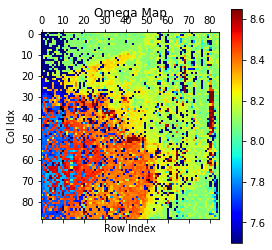

In [18]:
omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.5, 8.65, fig = 'omega_markov_map', path=now_path)

Completata Parameter_Map per Omega
Ho trovato 19 elementi saturati


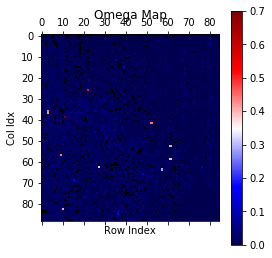

In [6]:
Delta_omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.7, fig = 'Delta_omega_markov_map', path=now_path, Deltas = True)

Completata Parameter_Map per Gamma
Ho trovato 19 elementi saturati


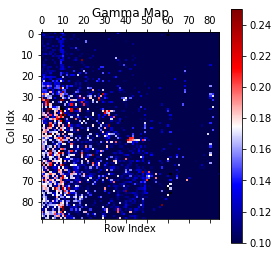

In [7]:
gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'seismic', 0.1,0.25, fig = 'Gamma_markov_map', path=now_path)

Completata Parameter_Map per Gamma
Ho trovato 19 elementi saturati


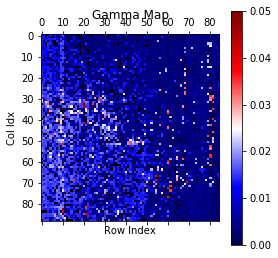

In [8]:
Delta_gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.05, fig = 'Delta_gamma_markov_map', path=now_path, Deltas = True)

(1, 55)


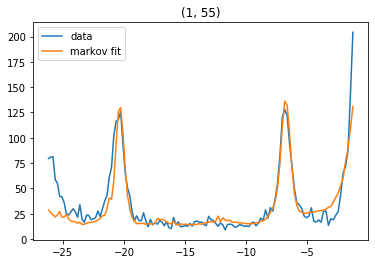

(1, 70)


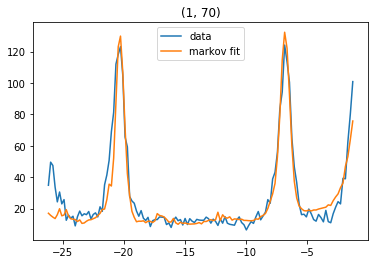

(1, 82)


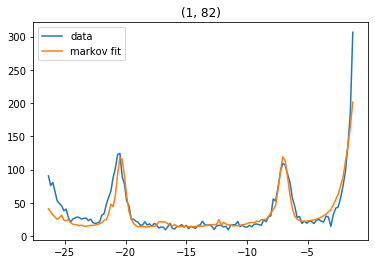

(2, 67)


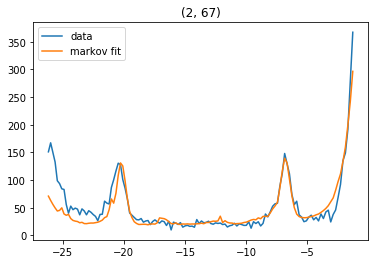

(4, 51)


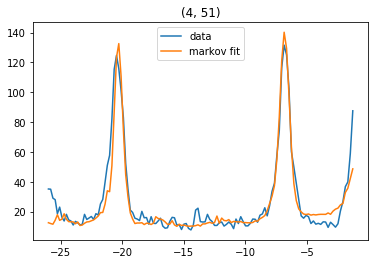

(4, 55)


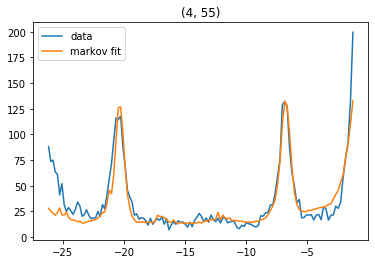

(4, 64)


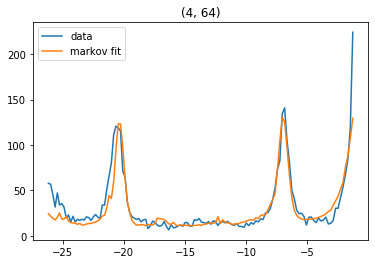

(5, 51)


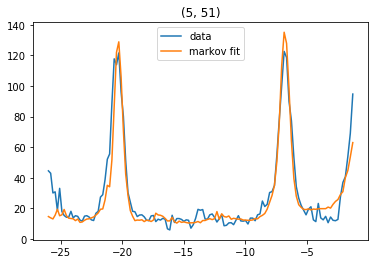

(5, 67)


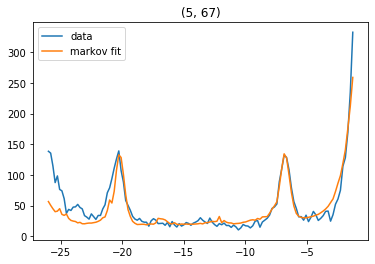

(6, 65)


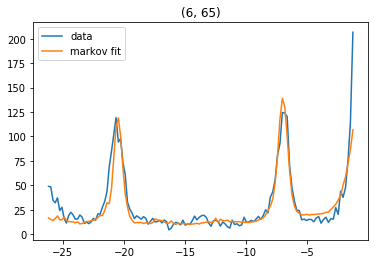

(7, 68)


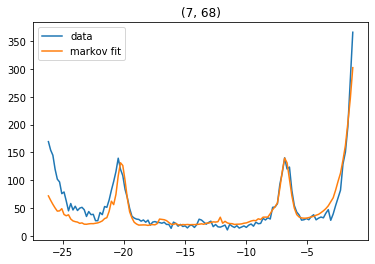

(9, 40)


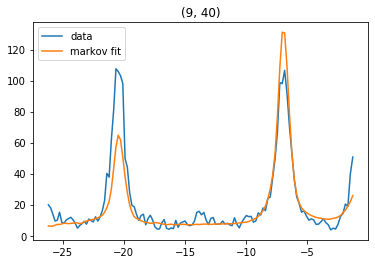

(9, 44)


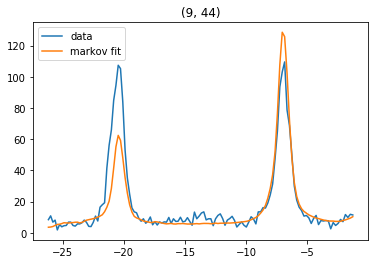

(9, 79)


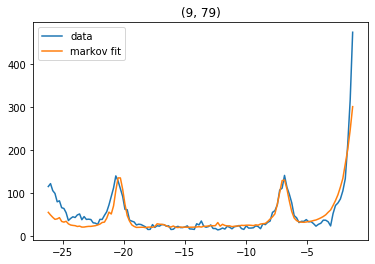

(10, 38)


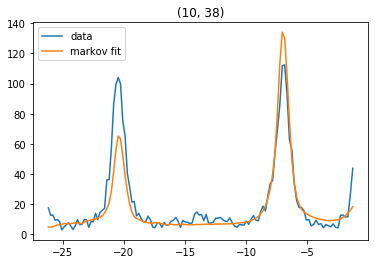

(10, 39)


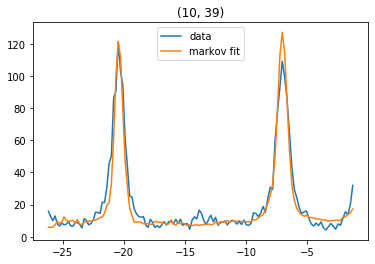

(10, 41)


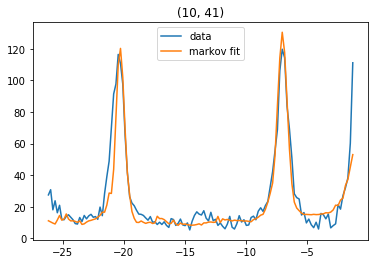

(10, 47)


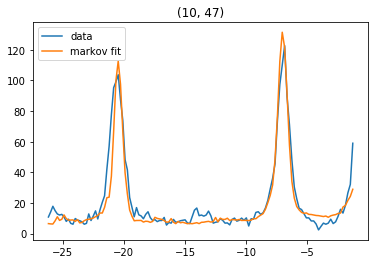

(10, 69)


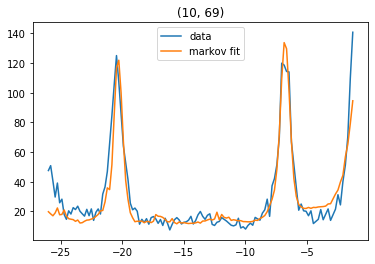

(11, 37)


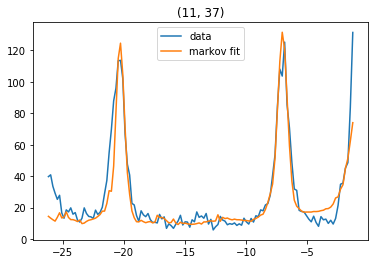

(11, 38)


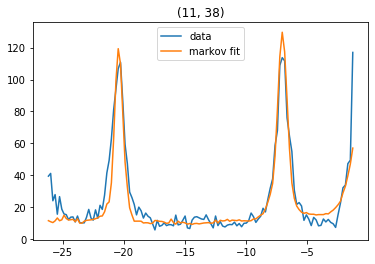

(11, 39)


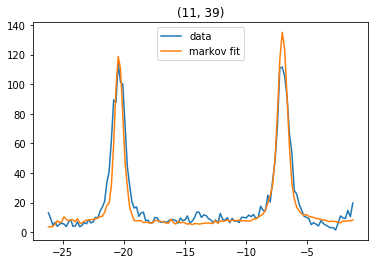

(11, 40)


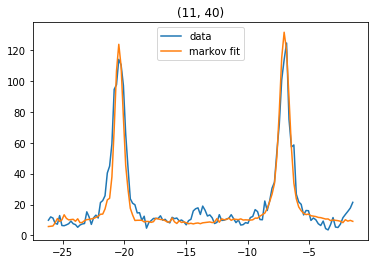

(11, 41)


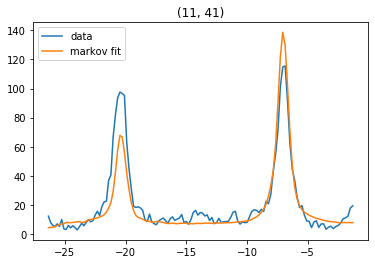

(11, 42)


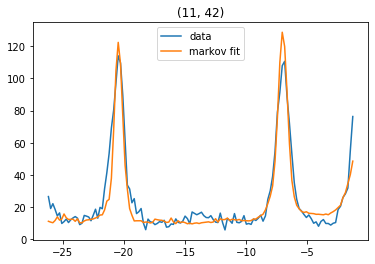

(11, 43)


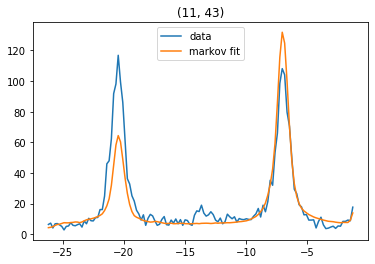

(11, 44)


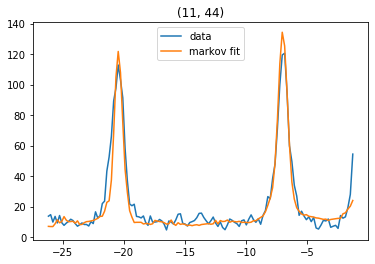

(11, 63)


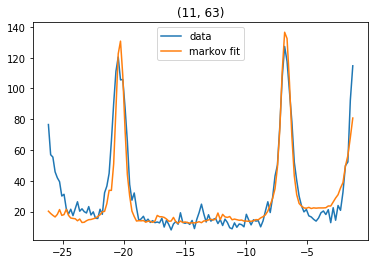

(11, 68)


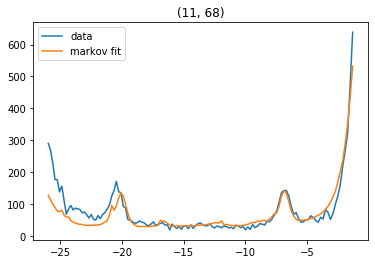

(11, 73)


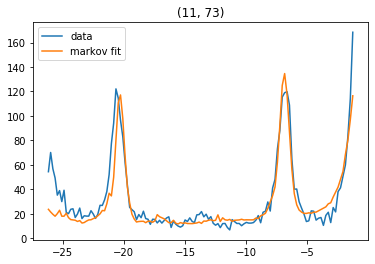

(11, 79)


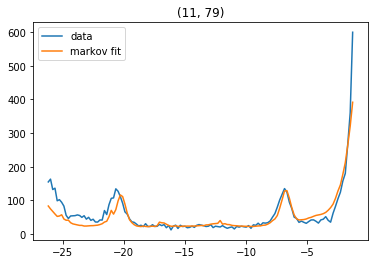

(12, 34)


KeyboardInterrupt: 

In [14]:
Plot_Elements_Spectrum(matrix, omega_too_high, fit = 'markov')


(40, 0)


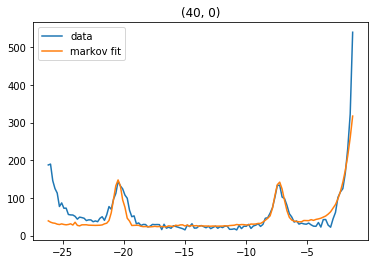

(40, 1)


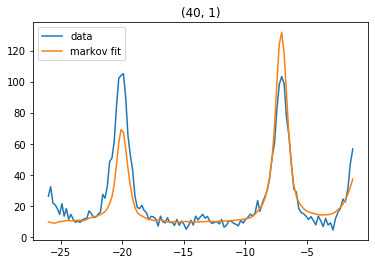

(40, 2)


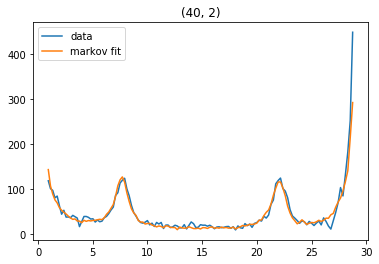

(40, 3)


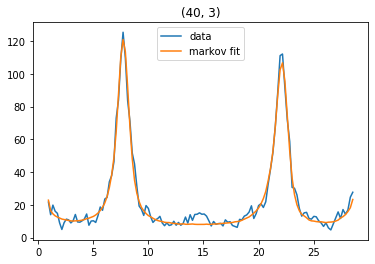

(40, 4)


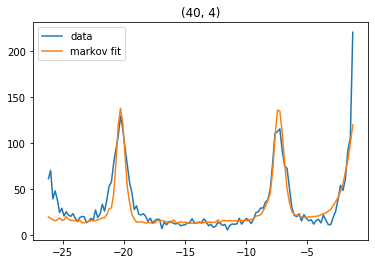

(40, 5)


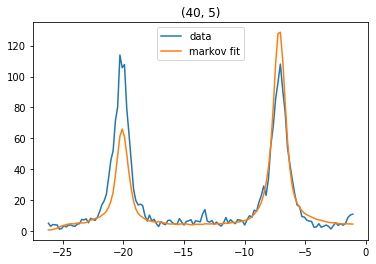

In [10]:
Plot_Elements_Spectrum(matrix, ((40,0), (40,1), (40, 2), (40,3), (40, 4), (40,5)), fit = 'markov')

In [11]:
################ TOTALE

with open(now_path+'y_tot_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_tot.txt', 'r') as fin:
    costi = fin.readlines()
with open(now_path+'tot_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,  boni) :
    matrix[ii][jj].Recover_Tot_Fit_Params(line)
    matrix[ii][jj].Recover_y_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_tot(float(cost))

print('Ok ho recuperato le informazioni del Fit Totale')

Ok ho recuperato le informazioni del Fit Totale


(60, 15)


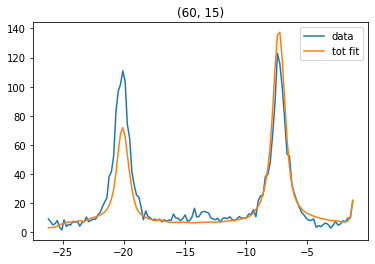

(60, 16)


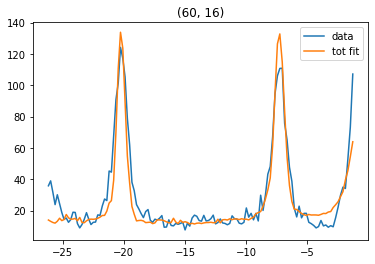

(60, 17)


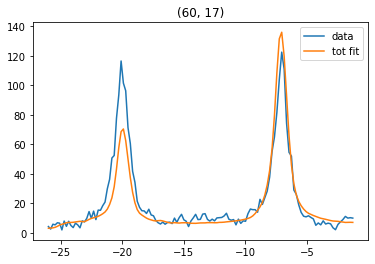

(60, 18)


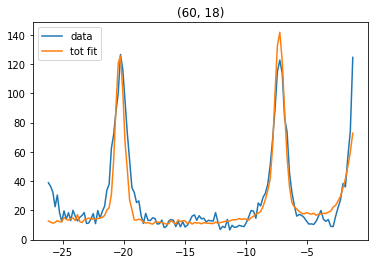

In [12]:
Plot_Elements_Spectrum(matrix, ((60, 15), (60, 16), (60, 17), (60,18)), fit = 'tot')

Completata Parameter_Map per Omega
Ho trovato 19 elementi saturati


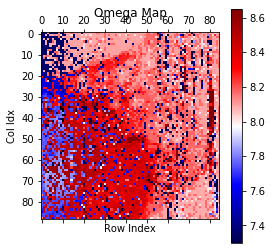

Completata Parameter_Map per Omega
Ho trovato 19 elementi saturati


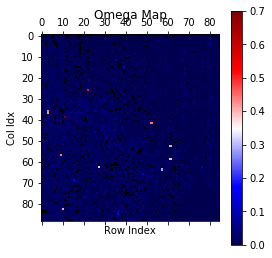

Completata Parameter_Map per Gamma
Ho trovato 19 elementi saturati


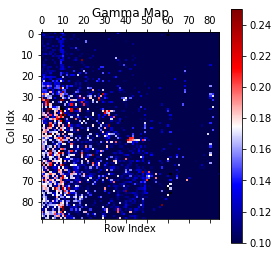

Completata Parameter_Map per Gamma
Ho trovato 19 elementi saturati


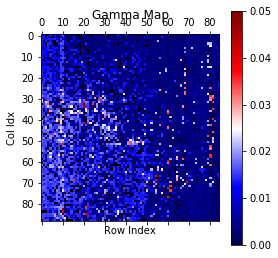

KeyError: 'tau'

In [19]:
omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'seismic', 7.3, 8.65, fig = 'omega_tot_map', path=now_path)
Delta_omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.7, fig = 'Delta_omega_tot_map', path=now_path, Deltas = True)
gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'seismic', 0.1,0.25, fig = 'Gamma_tot_map', path=now_path)
Delta_gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.05, fig = 'Delta_gamma_tot_map', path=now_path, Deltas = True)
tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'seismic', 0., 1., fig = 'tau_map', path=now_path)
Delta_tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'seismic', 0,0.7, fig = 'Delta_tau_map', path=now_path, Deltas = True)

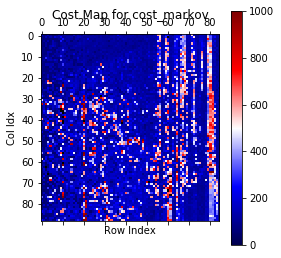

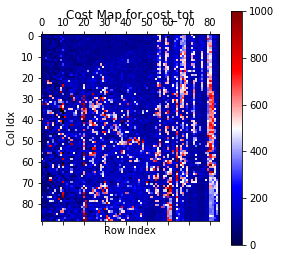

In [30]:
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)
tot_cost_map = Get_cost_map(matrix, 'tot', len(rows), len(cols), 'tot_cost_map', path = now_path)


In [29]:
def Get_cost_map(matrix, fit, n_rows, n_cols, fig, inf = 0, sup = 1000, cmap = 'seismic', path = './'):

    if fit == 'markov':
        attr = 'cost_markov'
    elif fit == 'tot':
        attr = 'cost_tot'

    cost_matrix = np.zeros((n_rows, n_cols))

    for ii in range(n_rows):
        for jj in range(n_cols):
            if hasattr(matrix[ii][jj], attr):
                cost_matrix[ii,jj] = getattr(matrix[ii][jj], attr)
            else:
                cost_matrix[ii,jj] = np.nan
    
    

    cm = plt.get_cmap(cmap)
    cm.set_bad(color='k')
    plt.matshow(cost_matrix, cmap = cmap)
    plt.clim(inf, sup)
    plt.title('Cost Map for '+attr)
    plt.colorbar()
    plt.xlabel('Row Index')
    plt.ylabel('Col Idx')
    plt.savefig(path + fig+'.pdf', format = 'pdf')
    plt.show()

    return cost_matrix

(0, 0)


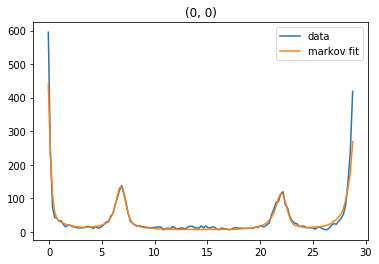

(0, 1)


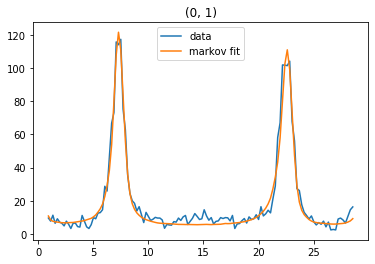

(0, 2)


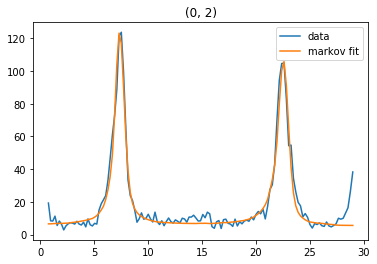

(0, 3)


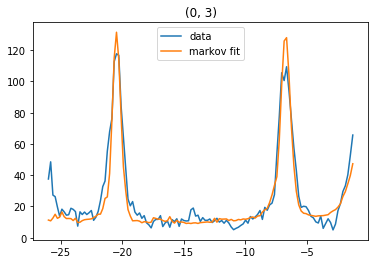

(0, 4)


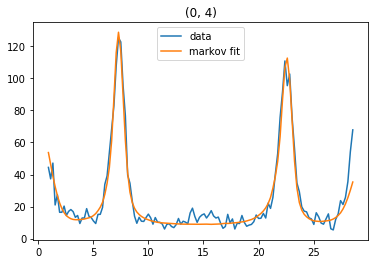

(0, 5)


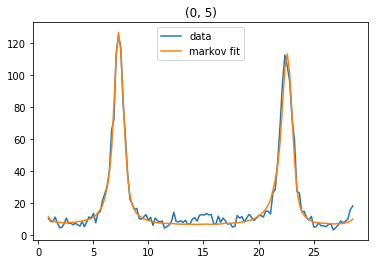

(0, 6)


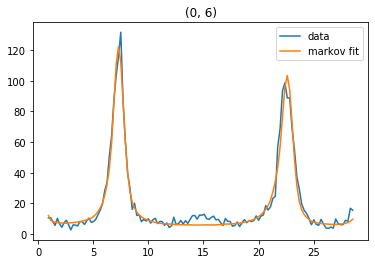

(0, 7)


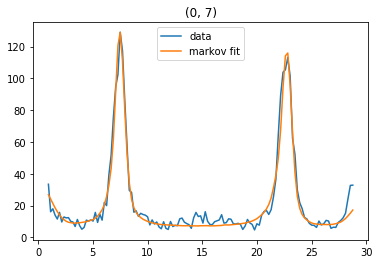

(0, 8)


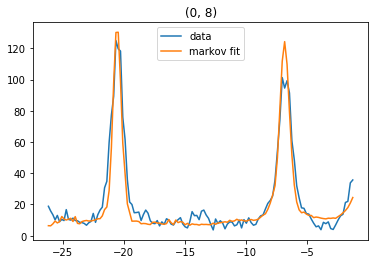

(0, 9)


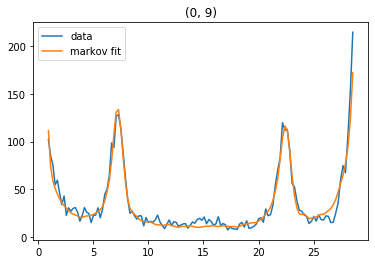

(0, 10)


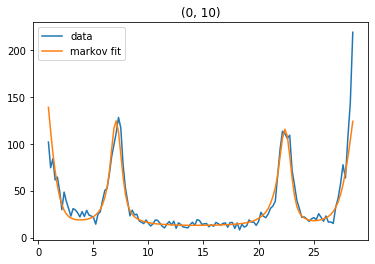

(0, 11)


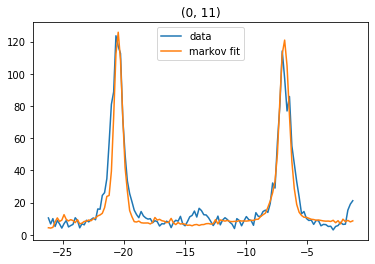

(0, 12)


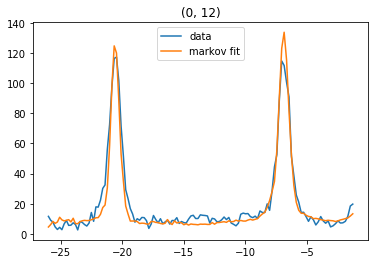

(0, 13)


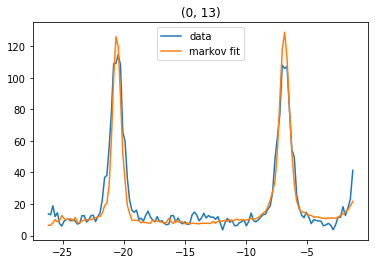

(0, 14)


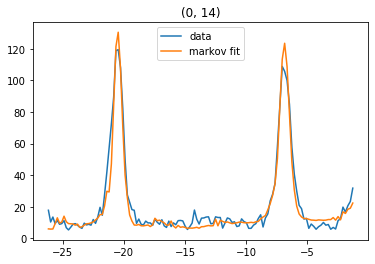

(0, 15)


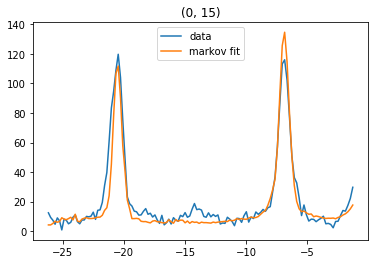

(0, 16)


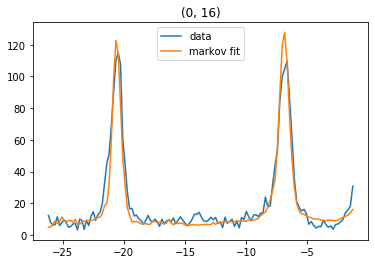

(0, 17)


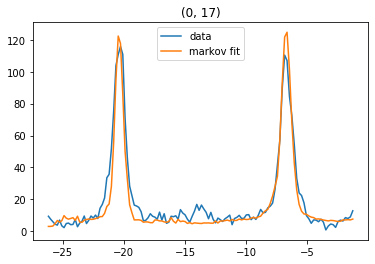

(0, 18)


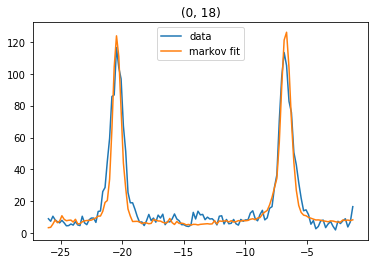

(0, 19)


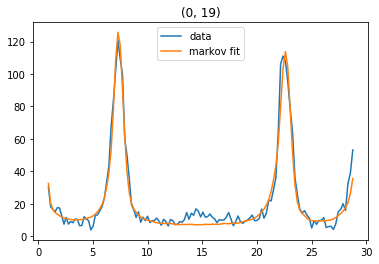

In [33]:
Plot_Elements_Spectrum(matrix, boni[0:20], fit = 'markov')

In [34]:
for (ii,jj) in boni[0:20]:
    print(matrix[ii][jj].Markov_Fit_Params)


Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.690403  7.380093  0.119961     0.346559         4.526239   
StdErrs   0.242094  0.019344  0.013036     0.036666         0.880408   
Initials  1.000000  7.653411  0.613204     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.848283e+02  10.409714  18.377639 -0.590578   0.756907  
StdErrs   7.409484e+08   7.496846  13.116684  0.015237   0.704313  
Initials  6.226355e+02  10.851784  16.706945  0.000000  22.742063  
                Co     Omega     Gamma  delta_width  delta_amplitude  \
Values    0.576202  7.352200  0.103899     0.331096         0.327227   
StdErrs   0.931994  0.021399  0.013048     0.302070         0.579251   
Initials  1.000000  7.653411  0.613204     0.500000         0.100000   

                     A         mu      sigma     shift     offset  
Values    6.574410e+02   9.766605  15.731842 -0.046762   3.331091  
StdErrs   1.392425e+09  24.854